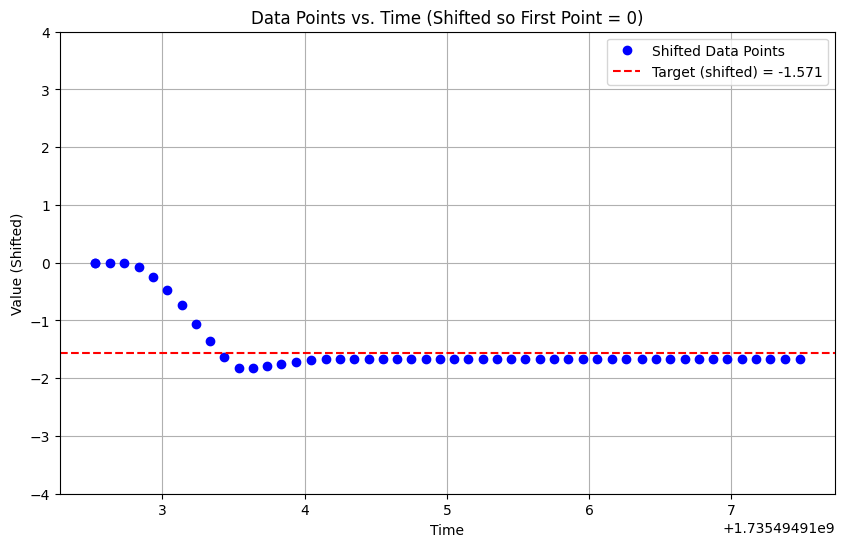

In [49]:
import json
import math
import matplotlib.pyplot as plt

# Path to your JSON file
filename = "/Users/spencersymington/Library/Containers/superart.SiriBodyControlMacOS/Data/Documents/pidMapData.json"

# 1) Load the JSON file
with open(filename, 'r') as f:
    pidData = json.load(f)

# 2) Extract 'targetValue' and the array of data points
targetValue = pidData["targetValue"]
dataPoints = pidData["dataPoints"]   # an array of {"x": <Double>, "y": <Double>}

# 3) Parse 'dataPoints' into separate lists for plotting
#    Here we use the second item as time (like before).
times = [point["y"] for point in dataPoints]   # originally stored as 'y'
values = [point["x"] for point in dataPoints]  # originally stored as 'x'

# --- Shift all data so that the *first* y value = 0 ------------------------ #
initial_value = values[0]
shifted_values = [v - initial_value for v in values]
shifted_target = targetValue - initial_value

# 4) Plot the data
plt.figure(figsize=(10, 6))

# Plot the data points (blue circles) with the shifted values
plt.plot(times, shifted_values, 'bo', label='Shifted Data Points')

# Draw a horizontal line at the shifted target
plt.axhline(y=shifted_target, color='r', linestyle='--',
            label=f'Target (shifted) = {shifted_target:.3f}')

# Constrain the y-axis to [-4, 4]
plt.ylim([-4, 4])

plt.xlabel("Time")
plt.ylabel("Value (Shifted)")
plt.title("Data Points vs. Time (Shifted so First Point = 0)")
plt.legend()
plt.grid(True)
plt.show()

